<a href="https://colab.research.google.com/github/ibutin/Innopoilis/blob/main/%D0%94%D0%97_Spark_%D0%91%D1%83%D1%82%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

# 1. Загрузите данные при помощи spark.read.csv из приложенного файла. Я не смог поставить PySpark в Jupiter. Загружу через pd.read, а там посмотрим как пойдет...

In [ ]:
df = pd.read_csv('iris_data2.csv')

In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 2.Выведите 5 первых строк данных

In [ ]:
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


# 3.Воспользуйтесь командами groupBy, max, min и avg, чтобы вывести максимальное минимальное и среднее значние каждого из аттрбутов цветка ('sepal_length','sepal_width','petal_length','petal_width')

In [ ]:
df.groupby(by=['Species']).min()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,1,4.3,2.3,1.0,0.1
Iris-versicolor,51,4.9,2.0,3.0,1.0
Iris-virginica,101,4.9,2.2,4.5,1.4


In [ ]:
df.groupby(by=['Species']).max()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,50,5.8,4.4,1.9,0.6
Iris-versicolor,100,7.0,3.4,5.1,1.8
Iris-virginica,150,7.9,3.8,6.9,2.5


In [ ]:
df.groupby(by=['Species']).mean()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
Iris-setosa,25.5,5.006,3.418,1.464,0.244
Iris-versicolor,75.5,5.936,2.770,4.260,1.326
Iris-virginica,125.5,6.588,2.974,5.552,2.026


# 4.Постройте точечную диаграмму для petal_length и petal_width

Давайте отобразим наши точки данных на двухмерном графике для того, чтобы взглянуть на наш набор данных визуально и посмотреть, сможем ли мы вручную найти какую–либо зависимость между данными:

Petal Lenght


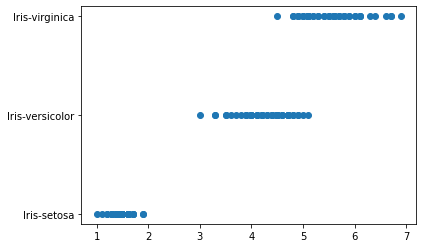

In [ ]:
print('Petal Lenght')
plt.scatter(df.PetalLengthCm,df.Species)
plt.show()

Petal Width


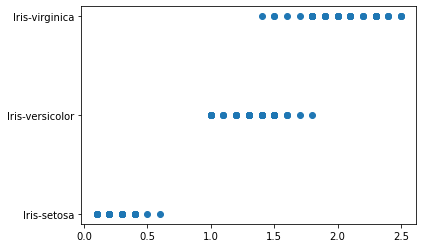

In [ ]:
print('Petal Width')
plt.scatter(df.PetalWidthCm,df.Species)
plt.show()

# 5.Посмотрите внимательно на получившийся график и сформируйте правило вида ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА A < ЗНАЧЕНИЕ, ТО IRIS ОТНОСИТСЯ К КЛАССУ SETOSA -ИНАЧЕ К КАКОМУ-ТО ДРУГОМУ (НАЗОВЕМ, ЕГО НАПРИМЕР UNKNOWN)

In [ ]:
df['MyPrediction'] = 'Unknown'
df.loc[df['PetalLengthCm'] < 2, 'MyPrediction'] = 'Iris-setosa'

In [ ]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,MyPrediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,Unknown
146,147,6.3,2.5,5.0,1.9,Iris-virginica,Unknown
147,148,6.5,3.0,5.2,2.0,Iris-virginica,Unknown
148,149,6.2,3.4,5.4,2.3,Iris-virginica,Unknown


# 7.Проверьте качество своего предсказания: Подсчитайте количество строк, где Вы предсказали класс Setosa и правильный классбыл так же Setosa. Подсчитайте количество строк, где Вы предсказаликласс Setosa, а правильный класс был какой-то другой (воспользуйтесь оператором "не равно" -!=)

In [ ]:
df_iris = df[df["Species"].isin(['Iris-setosa'])]

In [ ]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,MyPrediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


In [ ]:
df_iris['Prediction_accuracy'] = 'Wrong!'
df_iris.loc[df_iris['MyPrediction'] == df_iris['Species'], 'Prediction_accuracy'] = 'Correct'

C:\Users\75BD~1\AppData\Local\Temp/ipykernel_5504/1066924558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iris['Prediction_accuracy'] = 'Wrong!'
C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
df_iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,MyPrediction,Prediction_accuracy
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa,Correct
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa,Correct
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa,Correct
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa,Correct
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa,Correct
5,6,5.4,3.9,1.7,0.4,Iris-setosa,Iris-setosa,Correct
6,7,4.6,3.4,1.4,0.3,Iris-setosa,Iris-setosa,Correct
7,8,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa,Correct
8,9,4.4,2.9,1.4,0.2,Iris-setosa,Iris-setosa,Correct
9,10,4.9,3.1,1.5,0.1,Iris-setosa,Iris-setosa,Correct


In [ ]:
df_iris.groupby(by=['Prediction_accuracy']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,MyPrediction
Prediction_accuracy,,,,,,,
Correct,50,50,50,50,50,50,50


# Таким образом, все значения предсказанные этой моделью на 100% правильные - значений "Wrong" нет